## Import Libraries

In [4]:
# !pip install tensorflow
# !pip install opencv-python

import numpy as np  # linear algebra
import pandas as pd # data processing CSV file
import matplotlib.pyplot as plt
import seaborn as sns
import random
import cv2
from scipy.ndimage import zoom
from scipy import ndimage
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import os
from PIL import Image


## Dataset Preprocessing

- Reshape to grayscale image &
- Split data into training and test sets
- Add emotional labels 

In [5]:
def read_png_to_gray_matrix(folder_path, processed_dataset):
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg'):
            file_path = os.path.join(folder_path, filename)
            image = Image.open(file_path)
            gray_matrix = image.convert('L')
            dic = {"label": label_generate(folder_path), "matrix": np.asarray(gray_matrix)}
            processed_dataset.append(dic)
    return processed_dataset

In [6]:

def label_generate(path):
    if path == train_data_path[0] or path == test_data_path[0]:
        label = "angry"
        return label
    if path == train_data_path[1] or path == test_data_path[1]:
        label = "disgust"
        return label
    if path == train_data_path[2] or path == test_data_path[2]:
        label = "fear"
        return label
    if path == train_data_path[3] or path == test_data_path[3]:
        label = "happy"
        return label
    if path == train_data_path[4] or path == test_data_path[4]:
        label = "neutral"
        return label
    if path == train_data_path[5] or path == test_data_path[5]:
        label = "sad"
        return label
    if path == train_data_path[6] or path == test_data_path[6]:
        label = "surprise"
        return label
    else:
        raise ValueError("Invalid path")


In [7]:
train_data_path = [
    '../setData/original_data_set/train/angry',
    '../setData/original_data_set/train/disgust',
    '../setData/original_data_set/train/fear',
    '../setData/original_data_set/train/happy',
    '../setData/original_data_set/train/neutral',
    '../setData/original_data_set/train/sad',
    '../setData/original_data_set/train/surprise'
]

test_data_path = [
    '../setData/original_data_set/test/angry',
    '../setData/original_data_set/test/disgust',
    '../setData/original_data_set/test/fear',
    '../setData/original_data_set/test/happy',
    '../setData/original_data_set/test/neutral',
    '../setData/original_data_set/test/sad',
    '../setData/original_data_set/test/surprise'
]


In [8]:
def process_train_data(train_data_path, write_path="../setData/processed_data_set/train/data.npy", test=True):
    processed_dataset = []
    for path in train_data_path:
        # Assuming each path is a directory containing multiple PNG images
        processed_dataset = read_png_to_gray_matrix(path, processed_dataset)
       
    # Data Augmentation setting
    aug_data = []
    setMovement = True
    setSpin = True
    setFlip = True
    setZoom = True
    
    # move 10% of the data
    for data in processed_dataset:
        if setMovement:
            if random.randint(0,99) <= 10:
                moved_data = data
                offset_x = np.random.randint(-5, 5)
                offset_y = np.random.randint(-5, 5)
                moved_data["matrix"] = np.roll(data["matrix"], (offset_x, offset_y), axis=(0, 1))
                aug_data.append(moved_data)
        
    # rotate 10% of the data
    for data in processed_dataset:
        if setSpin:
            if random.randint(0,99) <= 10:
                spin_data = data
                angle = np.random.randint(-5, 5)
                spin_data["matrix"] = ndimage.rotate(data["matrix"], angle, reshape=False)
                aug_data.append(spin_data)
                
    # flip 10% of the data
    for data in processed_dataset:
        if setFlip:
            if random.randint(0,99) <= 10:
                flip_data = data
                flip_data["matrix"] = np.flip(data["matrix"], axis=1)
                aug_data.append(flip_data)
                
    # zoom 10% of the data
    for data in processed_dataset:
        if setZoom:
            if random.randint(0, 99) <= 10:
                original_size = 48
                scale_factor = np.random.uniform(1, 1.2)
                new_size = int(original_size * scale_factor)
                zoom_data = data
                resized_matrix = cv2.resize(data["matrix"], (new_size, new_size), interpolation=cv2.INTER_LINEAR)
                start = (new_size - original_size) // 2
                end = start + original_size
                cropped_matrix = resized_matrix[start:end, start:end]
                zoom_data["matrix"] = cropped_matrix
                aug_data.append(zoom_data)
    
    # merge dataset
    processed_dataset = processed_dataset + aug_data
    
    # Shuffle the training dataset
    np.random.shuffle(processed_dataset)

    # Save the processed dataset
    np.save(write_path, processed_dataset, allow_pickle=True)

    # Test output, can be set to False if not needed
    if test:
        check = np.load(write_path, allow_pickle=True)
        print(check[:5])
        print(check[5:])


def process_test_data(test_data_path, write_path="../setData/processed_data_set/test/data.npy", test=False):
    processed_dataset = []
    for path in test_data_path:
        # Assuming each path is a directory containing multiple PNG images
        processed_dataset = read_png_to_gray_matrix(path, processed_dataset)

    # Optionally shuffle the test dataset - usually, you wouldn't shuffle test data
    # np.random.shuffle(processed_dataset) # Commenting this out as it's typically not done for test sets

    # Save the processed dataset
    np.save(write_path, processed_dataset, allow_pickle=True)

    # Test output, can be set to False if not needed
    if test:
        check = np.load(write_path, allow_pickle=True)
        print(check[:5])

In [9]:
process_train_data(train_data_path)
process_test_data(test_data_path)

[{'label': 'neutral', 'matrix': array([[163, 162, 167, ...,  49,  43,  68],
        [163, 163, 164, ...,  69,  38,  51],
        [165, 161, 165, ...,  52,  69,  43],
        ...,
        [168, 172, 188, ..., 187, 205, 214],
        [165, 168, 194, ..., 186, 205, 214],
        [164, 171, 194, ..., 183, 210, 213]], dtype=uint8)}
 {'label': 'fear', 'matrix': array([[ 26,  27,  31, ...,  99, 126, 142],
        [ 25,  26,  26, ..., 101, 127, 144],
        [ 19,  24,  28, ..., 103, 130, 146],
        ...,
        [ 23,  24,  26, ..., 139, 163, 164],
        [ 22,  27,  28, ..., 143, 161, 163],
        [ 22,  20,  25, ...,  87, 160, 163]], dtype=uint8)}
 {'label': 'happy', 'matrix': array([[16, 35, 54, ..., 40, 37, 31],
        [20, 37, 50, ..., 40, 37, 30],
        [22, 32, 37, ..., 36, 36, 29],
        ...,
        [ 9, 24, 40, ..., 22, 36, 24],
        [ 7, 18, 32, ..., 24, 28, 17],
        [10, 15, 20, ..., 30, 20, 10]], dtype=uint8)}
 {'label': 'sad', 'matrix': array([[74, 79, 69, ..., 5

## Dataset Visualization

Training Data Shape: (41289, 2)
   emotion                                             pixels
0  neutral  [163, 162, 167, 75, 0, 7, 6, 6, 7, 9, 7, 13, 9...
1     fear  [26, 27, 31, 35, 53, 72, 86, 86, 88, 93, 96, 9...
2    happy  [16, 35, 54, 50, 29, 27, 27, 28, 39, 50, 60, 7...
3      sad  [74, 79, 69, 66, 93, 74, 74, 77, 64, 52, 67, 6...
4  neutral  [14, 12, 11, 10, 10, 10, 9, 8, 7, 7, 8, 9, 8, ...

Test Data Shape: (7178, 2)
  emotion                                             pixels
0   angry  [83, 75, 62, 51, 56, 61, 33, 19, 13, 15, 13, 4...
1   angry  [127, 126, 123, 119, 115, 112, 111, 111, 110, ...
2   angry  [250, 251, 251, 249, 250, 250, 248, 251, 250, ...
3   angry  [94, 183, 202, 212, 214, 219, 222, 217, 200, 2...
4   angry  [73, 78, 86, 101, 113, 117, 123, 129, 127, 118...


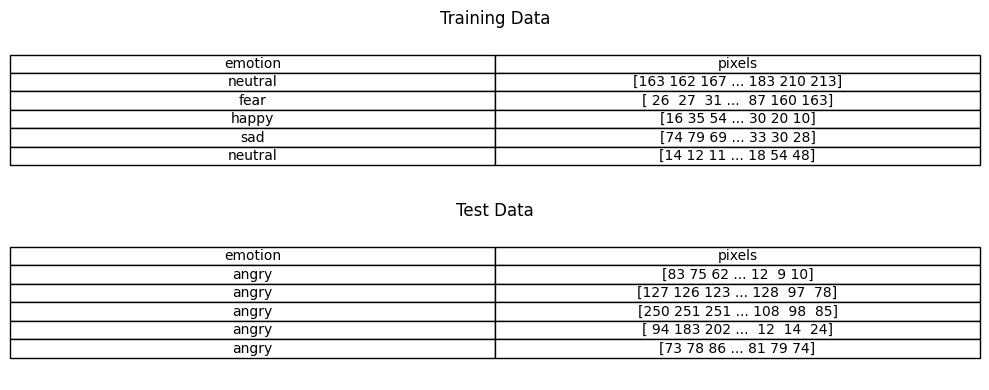

In [10]:
# Load training data from dataset
train_data_path = "../setData/processed_data_set/train/data.npy"
test_data_path = "../setData/processed_data_set/test/data.npy"

# Load data
train_data = np.load(train_data_path, allow_pickle=True)
test_data = np.load(test_data_path, allow_pickle=True)

# Convert datasets to dataframes
train_df = pd.DataFrame([{'emotion': d['label'], 'pixels': d['matrix'].flatten()} for d in train_data])
test_df = pd.DataFrame([{'emotion': d['label'], 'pixels': d['matrix'].flatten()} for d in test_data])

# Check dataset shapes & preview first 5 rows of each data
print("Training Data Shape:", train_df.shape)
print(train_df.head())
print("\nTest Data Shape:", test_df.shape)
print(test_df.head())

# Plotting the DataFrames as an image
fig, axs = plt.subplots(2, 1, figsize=(10, 4))  # Adjust the figure size as needed

# Training Data Visualization
axs[0].axis('tight')
axs[0].axis('off')
axs[0].set_title('Training Data')
table_train = axs[0].table(cellText=train_df.head().values, colLabels=train_df.columns, cellLoc='center', loc='center')

# Test Data Visualization
axs[1].axis('tight')
axs[1].axis('off')
axs[1].set_title('Test Data')
table_test = axs[1].table(cellText=test_df.head().values, colLabels=test_df.columns, cellLoc='center', loc='center')

plt.tight_layout()
plt.show()

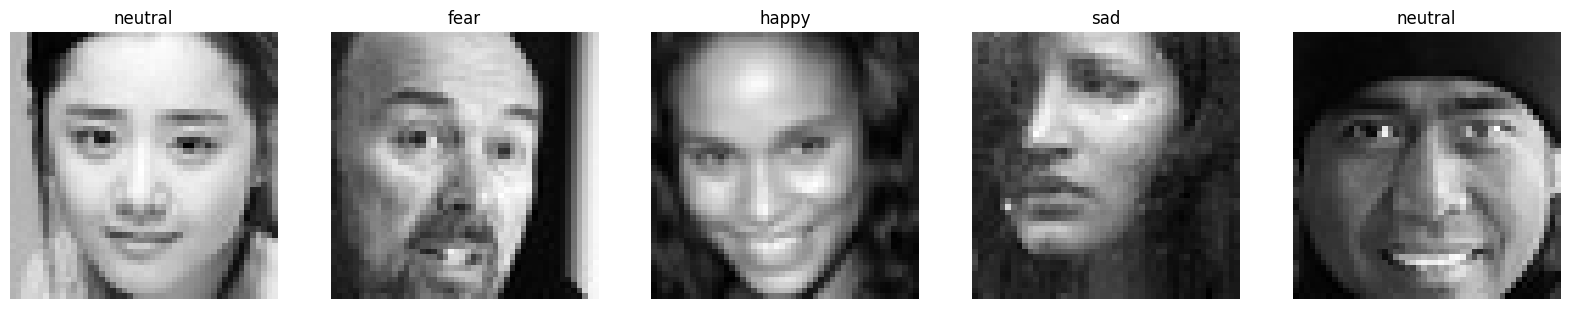

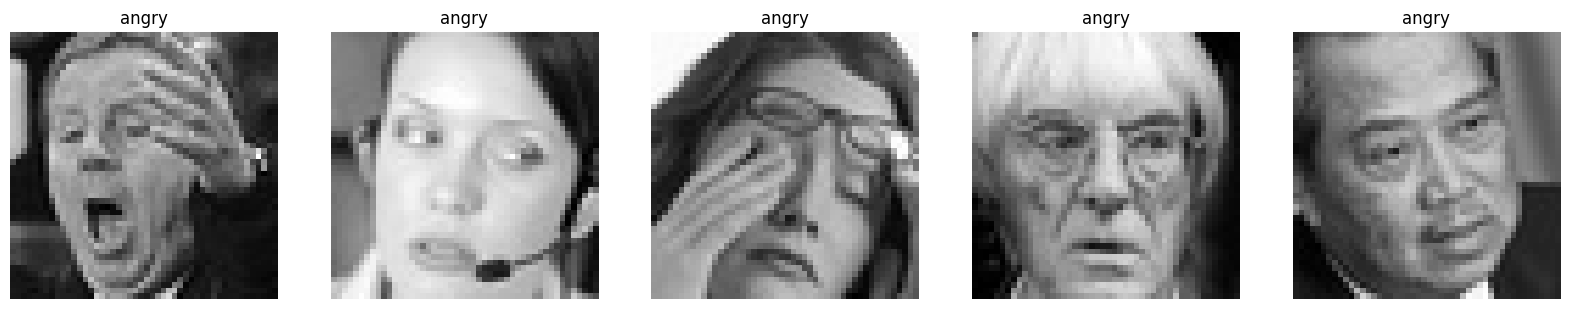

In [16]:
# Function to plot the first 5 images and their labels
def plot_first_five_images(df):
    fig, axes = plt.subplots(1, 5, figsize=(20, 4)) # Creates a figure with 5 subplots
    for i, ax in enumerate(axes.flat):
        # Assuming the images are square, compute the size for reshape
        img_size = int(len(df['pixels'].iloc[i]) ** 0.5)
        img = df['pixels'].iloc[i].reshape(img_size, img_size)
        
        ax.imshow(img, cmap='gray') # Display an image in grayscale
        ax.set_title(df['emotion'].iloc[i]) # Set the title to the image's emotion
        ax.axis('off') # Hide the axes ticks

    plt.show()

# Assuming df is your DataFrame containing the data
plot_first_five_images(train_df)
plot_first_five_images(test_df)


In [90]:
def print_emotion_counts(df, dataset_name):
    emotion_counts = df['emotion'].value_counts().reset_index()
    emotion_counts.columns = ['emotion', 'number']
    print(f"{dataset_name} Dataset Emotion Counts:")
    print(emotion_counts)

# Calculate and print emotion counts for both datasets
print_emotion_counts(train_df, "Training")
print()
print_emotion_counts(test_df, "Testing")


Training Dataset Emotion Counts:
    emotion  number
0     happy   10436
1   neutral    7184
2       sad    6979
3      fear    5846
4     angry    5791
5  surprise    4595
6   disgust     632

Testing Dataset Emotion Counts:
    emotion  number
0     happy    1774
1       sad    1247
2   neutral    1233
3      fear    1024
4     angry     958
5  surprise     831
6   disgust     111


/var/folders/6h/7snzfhy12zq8rv3fvwh7h4b80000gn/T/ipykernel_26880/3707285847.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='emotion', y='number', data=emotion_counts_sorted, palette=colors)


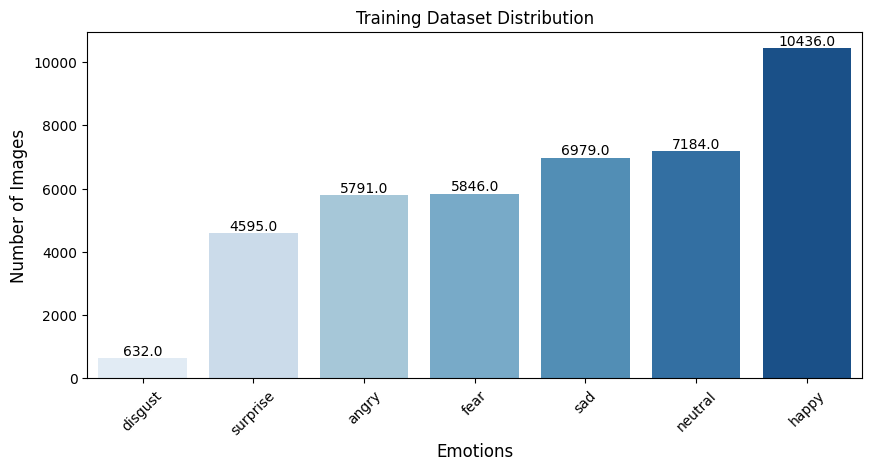

/var/folders/6h/7snzfhy12zq8rv3fvwh7h4b80000gn/T/ipykernel_26880/3707285847.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='emotion', y='number', data=emotion_counts_sorted, palette=colors)


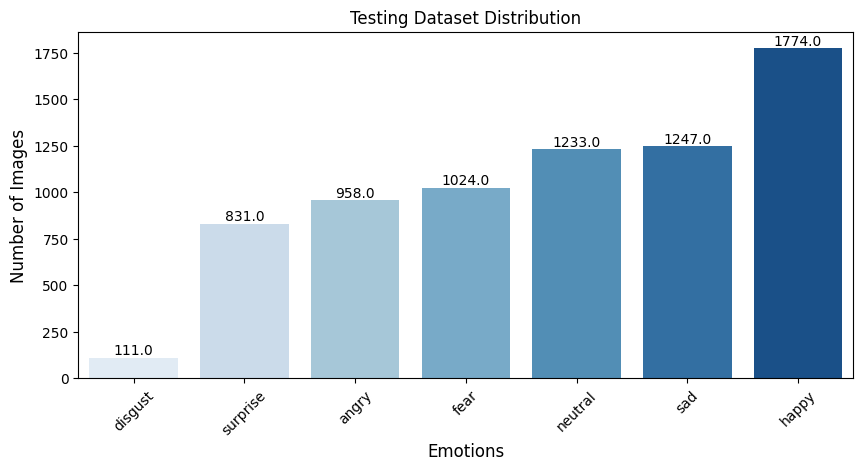

In [91]:
# Function to plot emotion distribution
def plot_emotion_distribution(df, dataset_name):
    emotion_counts = df['emotion'].value_counts().reset_index()
    emotion_counts.columns = ['emotion', 'number']
    emotion_counts_sorted = emotion_counts.sort_values(by='number', ascending=True)
    colors = sns.color_palette("Blues", len(emotion_counts_sorted))
    
    plt.figure(figsize=(10, 4.5))
    bar_plot = sns.barplot(x='emotion', y='number', data=emotion_counts_sorted, palette=colors)
    plt.title(f'{dataset_name} Dataset Distribution')
    plt.ylabel('Number of Images', fontsize=12)
    plt.xlabel('Emotions', fontsize=12)
    plt.xticks(rotation=45)
    
    for p in bar_plot.patches:
        bar_plot.annotate(format(p.get_height(), '.1f'),
                          (p.get_x() + p.get_width() / 2., p.get_height()),
                          ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    
    plt.show()

# Plot emotion distribution for both datasets
plot_emotion_distribution(train_df, "Training")
plot_emotion_distribution(test_df, "Testing")


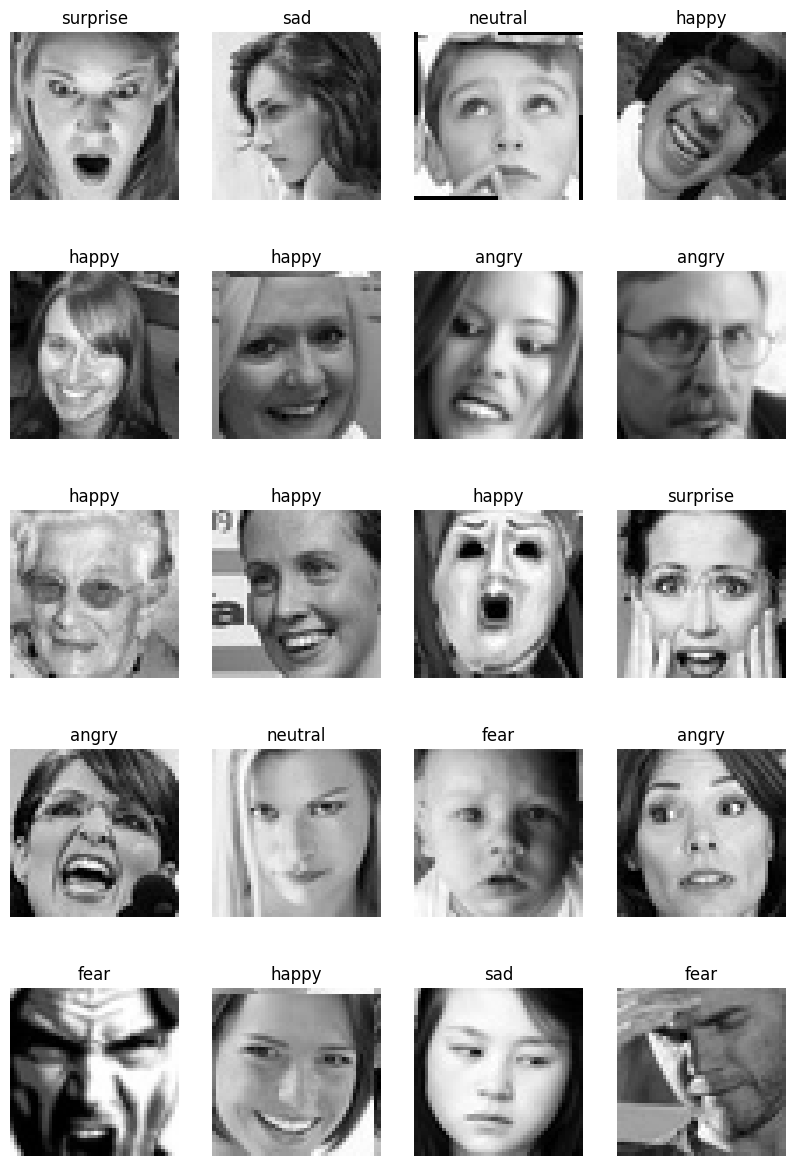

In [70]:
labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

fig = plt.figure(figsize=(10, 15))
columns = 4
rows = 5

# Iterate to display images
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    # Randomly select an index from the DataFrame
    random_index = random.randint(0, len(df) - 1)
    img = df.iloc[random_index]['pixels'].reshape(48,48)
    emotion = df.iloc[random_index]['emotion']
    plt.imshow(img, cmap='gray')
    plt.title(emotion)
    plt.axis('off')  

plt.show()

## CNN Model

In [72]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

In [73]:
# CNN model
def cnn_model(input_shape, num_classes):
    model = models.Sequential([
        # Convolutional and pooling layers
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        # Flattening the 3D outputs to 1D and adding dense layers
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        # Output layer
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Label to number mapping
def label_generate(label):
    labels_dict = {"angry": 0, "disgust": 1, "fear": 2, "happy": 3, 
                   "neutral": 4, "sad": 5, "surprise": 6}
    return labels_dict.get(label, None)


In [74]:
# Model parameters
input_shape = (48, 48, 1)
num_classes = 7

# Build the CNN model
model = cnn_model(input_shape, num_classes)

# Load data (paths may need to be adjusted based on your directory structure)
train_data_path = "../setData/processed_data_set/train/data.npy"
train_data = np.load(train_data_path, allow_pickle=True)
test_data_path = "../setData/processed_data_set/test/data.npy"
test_data = np.load(test_data_path, allow_pickle=True)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Prepare the data for training
image_matrix = np.array([item['matrix'] for item in train_data]).reshape(-1, 48, 48, 1)
labels = np.array([label_generate(item['label']) for item in train_data])
test_image_matrix = np.array([item['matrix'] for item in test_data]).reshape(-1, 48, 48, 1)
test_labels = np.array([label_generate(item['label']) for item in test_data])


/Users/ericsheng495/anaconda3/envs/facial-recog/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [75]:
# Train the model
history = model.fit(image_matrix, labels,
                    epochs=30,
                    batch_size=64,
                    validation_data=(test_image_matrix, test_labels))

# Save the model
model.save("model/trained_cnn_model.h5")

Epoch 1/30
648/648 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.2391 - loss: 2.8358 - val_accuracy: 0.3848 - val_loss: 1.5987
Epoch 2/30
648/648 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.3687 - loss: 1.6244 - val_accuracy: 0.4316 - val_loss: 1.4789
Epoch 3/30
648/648 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.4293 - loss: 1.4768 - val_accuracy: 0.4759 - val_loss: 1.3625
Epoch 4/30
648/648 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.4705 - loss: 1.3918 - val_accuracy: 0.4967 - val_loss: 1.3301
Epoch 5/30
648/648 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.5034 - loss: 1.3017 - val_accuracy: 0.4939 - val_loss: 1.3555
Epoch 6/30
648/648 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.5303 - loss: 1.2380 - val_accuracy: 0.5025 - val_loss: 1.3287
Epoch 7/30
648/648 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.5547 - loss: 1.1835 - val_accuracy: 0.5148 - val_loss: 1.3010
Epoch 8/30
648/648 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.5864 - loss: 1.0958 - 

## Model Evaluation

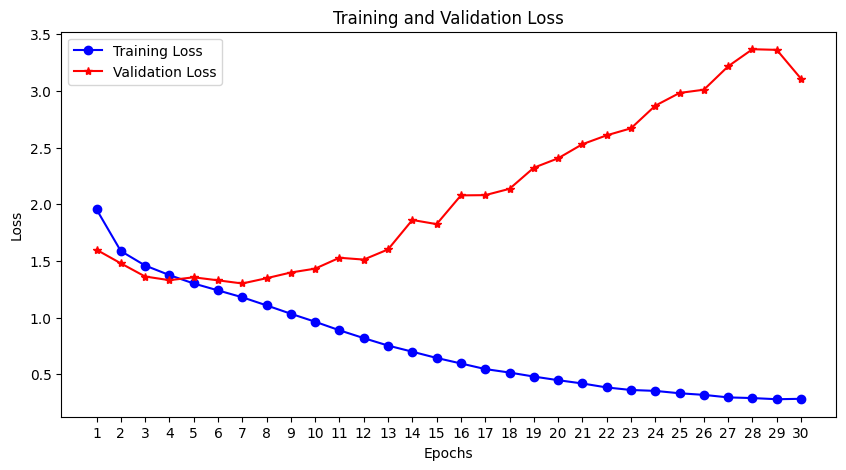

In [77]:
import matplotlib.pyplot as plt

# Plotting the loss for every 5th epoch
epochs = range(1, len(history.history['loss']) + 1)
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

plt.figure(figsize=(10, 5))
plt.plot(epochs, training_loss, 'bo-', label='Training Loss')
plt.plot(epochs, validation_loss, 'r*-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs[::1])  # Show only every 5th epoch
plt.legend()
plt.show()

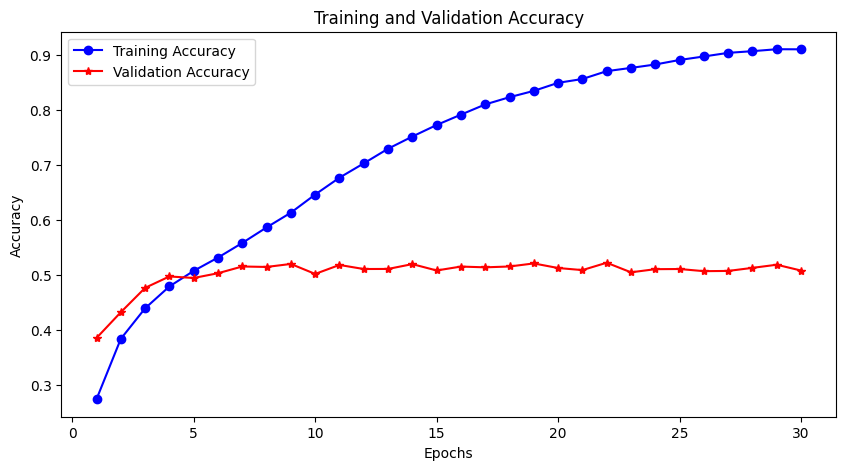

In [78]:
# Plotting the accuracy for each epoch
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

plt.figure(figsize=(10, 5))
plt.plot(epochs, training_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r*-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()